In [ ]:
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
  markers = ('s', 'x', 'o', '^', 'v')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])

  # 결정경계
  x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
  Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  Z = Z.reshape(xx1.shape)
  plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())

  # 샘플의 산점도
  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=colors[idx], label=cl, edgecolor='black')

# **로지스틱 회귀**


## 경사하강법을 사용한 로지스틱 회귀

In [ ]:
class LogisticRegressionGD(object):
  '''경사 하강법을 사용한 로지스틱 회귀 분류기
  
  매개변수
  ---------
  eta: float (학습률)
  n_iter: int (훈련 데이터 셋 반복 횟수)
  random_state: int (가중치 무작위 초기화를 위한 난수 생성기 시드)
  
  속성
  ---------
  w_ : 1d-array (학습된 가중치)
  cost_ : list (에포크(학습의 횟수)마다 누적된 로지스틱 비용 함수 값)
  '''

  def __init__(self, eta=0.05, n_iter=100, random_state=1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state
  
  def fit(self, X, y):
    rgen = np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc=0, scale=0.01, size = 1 + X.shape[1])
    self.cost_ = []

    for i in range(self.n_iter):
      net_input = self.net_input(X)
      output = self.activation(net_input)
      errors = (y - output)
      self.w_[1:] += self.eta*X.T.dot(errors)
      self.w_[0:] += self.eta*errors.sum()

      cost = (- y.dot(np.log(output)) - (1-y).dot(np.log(1-output)))
      self.cost_.append(cost)

    return self
  
  def net_input(self, X):
    # 설명변수의 선형결합
    return np.dot(X, self.w_[1:]) + self.w_[0]

  def activation(self, z):
    # 로지스틱 시그모이드 활성화 함수
    return 1 / (1 - np.exp(-np.clip(z, -250, 250)))

  def predict(self, X):
    # 단위 계단 함수 이용해 클래스 레이블 반환
    return np.where(self.net_input(X) >= 0.5, 1, 0)


In [ ]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [ ]:
X_train_01_subset = X_train[(y_train==0)|(y_train==1)]
y_train_01_subset = y_train[(y_train==0)|(y_train==1)]

In [ ]:
Irgd = LogisticRegressionGD(eta=0.05, n_iter=1000, random_state=1)

In [ ]:
Irgd.fit(X_train_01_subset, y_train_01_subset)

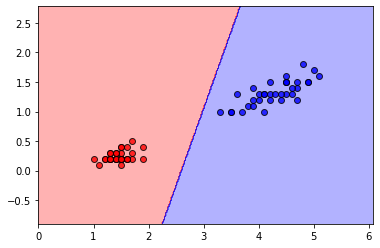

In [ ]:
plot_decision_regions(X=X_train_01_subset, y=y_train_01_subset, classifier=Irgd)

## 사이킷런으로 로지스틱 회귀 훈련


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [ ]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

In [ ]:
from sklearn.linear_model import LogisticRegression
Ir = LogisticRegression(C=100, random_state=1)     # C: 규제하이퍼파라미터 람다의 역수로, C 감소하면 규제강도 증가
Ir.fit(X_train_std, y_train)

LogisticRegression(C=100, random_state=1)

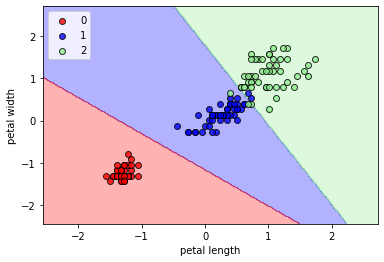

In [ ]:
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=Ir)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')

In [26]:
# 각 행은 각 행의 붓꽃의 클래스 소속 확률
Ir.predict_proba(X_test_std[:3, :])

array([[1.52213484e-12, 3.85303417e-04, 9.99614697e-01],
       [9.93560717e-01, 6.43928295e-03, 1.14112016e-15],
       [9.98655228e-01, 1.34477208e-03, 1.76178271e-17]])

# **서포트 벡터 머신**

## 선형 SVM

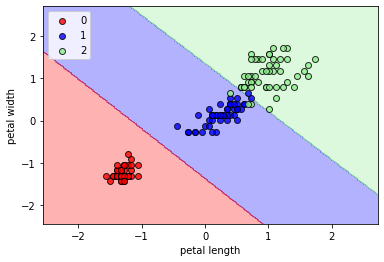

In [27]:
# 선형 svm
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1, random_state=1)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')

In [ ]:
from sklearn.linear_model import SGDClassifier
ppn = SGDClassifier(loss='perceptron') #퍼셉트론
Ir = SGDClassifier(loss='log')  #로지스틱 회귀
svm = SGDClassifier(loss='hinge') #서포트 벡터 머신

## 커널 SVM (비선형) 